<div style="background: linear-gradient(to right, #f9fffc, #e6f7ff); padding: 25px; border: 3px solid #00a8ff; border-radius: 12px; box-shadow: 3px 3px 12px rgba(0,0,0,0.08);">

<h1 align="center" style="color:#007acc;">🧹 Data Cleaning Masterclass 🧼</h1>

<p align="center" style="font-size:17px; color:#444;">
Welcome to this comprehensive guide on <strong>Data Cleaning</strong> — the first and most crucial step in any data science or machine learning project. 🚀  <br>
In this notebook, we will walk through <strong>practical, hands-on techniques</strong> to clean, preprocess, and prepare your dataset for powerful analytics and predictive modeling.
</p>

<hr>

🎯 <strong>What You'll Learn:</strong><br>

✅ Identifying and handling missing values <br> 
✅ Removing duplicates and fixing inconsistent types  <br>
✅ Outlier treatment and visual validation <br> 
✅ Encoding, scaling, and data transformation  <br>
✅ Feature engineering tips to unlock hidden insights  <br>

<hr>

<p style="color:#007acc; font-weight:bold; text-align:center; font-size:16px;">
Let’s dive into the data and turn raw chaos into valuable clarity! 💡
</p>

</div>


<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #007acc; border-radius: 8px">

<font size="5">  <span style="color:#007acc">Introduction: The Power of Data Cleaning </span> 🧼<br>
</font>

<font size="3"><strong>📌 Data Cleaning</strong> </font>is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.<br>
In the world of data science and machine learning, <b>data cleaning</b> is a critical first step. Raw data is often messy, inconsistent, incomplete, and filled with noise. Without cleaning, models may produce misleading or inaccurate results.<br>

<hr>
</div>


##  Why is Data Cleaning Important? 🚀 <br>

- 🔍 Enhances <strong>data quality</strong> for analysis and modeling  <br>
- 📈 Improves <strong>model accuracy</strong> and performance  <br>
- 🧠 Helps uncover <strong>patterns</strong> hidden in noise  <br>
- ✅ Reduces <strong>bias</strong> and ensures <strong>reliable insights</strong><br>




🧭 <span style="font-size:18px; color:#2e8b57"><b>Let’s begin our journey toward clean and reliable data!</b></span> 🔍


 <hr>

<div style="background-color:#f1f8ff; padding: 15px; border-left: 5px solid #4682b4; border-radius: 8px; font-size: 29px">
 Dataset Overview📦
</div>



<div style="background-color:#f1f8ff; padding: 15px; border-left: 5px solid #4682b4; border-radius: 8px;font-size: 16px">
<font size="6">
About the Dataset: Ames Housing 📦</font><br>
The <strong>Ames Housing dataset</strong> contains detailed information on residential homes sold in Ames, Iowa between 2006 and 2010. It is known for its rich feature set and real-world complexity, making it an excellent choice to demonstrate data cleaning techniques.

</div>


<div style="background-color:#f1f8ff; padding: 15px; border-left: 5px solid #4682b4; border-radius: 8px">

<font size="5">  Key Highlights📌 :</font><br>
- 81 features per home sale record<br>
- A mix of <strong>categorical</strong>, <strong>ordinal</strong>, and <strong>numerical</strong> variables <br>
- Includes house characteristics, quality ratings, and sale prices <br>
- Contains <strong>missing values</strong>, <strong>outliers</strong>, and <strong>inconsistent entries</strong><br>

</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset-missing/DataDesc.txt
/kaggle/input/ames-housing-dataset-missing/TrainData.csv
/kaggle/input/ames-housing-dataset-missing/TestData.csv
/kaggle/input/housepriceprediction/train_data.csv
/kaggle/input/housepriceprediction/test_data.csv
/kaggle/input/housing/target.csv
/kaggle/input/housing/train.csv
/kaggle/input/housing/test.csv
/kaggle/input/housing/AmesHousing.csv
/kaggle/input/ames-housing-dataset/AmesHousing.csv
/kaggle/input/advance-house-price-predicitons/sample_submission.csv
/kaggle/input/advance-house-price-predicitons/data description.txt
/kaggle/input/advance-house-price-predicitons/formulatedtest.csv
/kaggle/input/advance-house-price-predicitons/train.csv
/kaggle/input/advance-house-price-predicitons/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/i

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Setting display options for better readability
pd.set_option('display.max_columns', None)

# Loading the dataset
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Displaying the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [5]:
# Check shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 1460 rows and 81 columns.


In [6]:
# View column types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Descriptive statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<div style="background-color:#fff4f4; padding: 15px; border-left: 5px solid #e74c3c; border-radius: 8px">
<font size="5">
<strong>🧩 1. Handling Missing Data </strong><br><br>
</font>

<font size="3">
Missing data is one of the most common challenges in real-world datasets. Handling it effectively ensures your models are accurate and reliable. <br><br>
</font>


<font size="4">
🔍 Identifying Missing Values
</font>
</div>



In [8]:

# Total missing values per column
df.isnull().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

<div style="background-color:#fef9e7; padding: 15px; border-left: 5px solid #f4c542; border-radius: 8px">

## 🛠️ <span style="color:#b9770e">Techniques to Handle Missing Data</span>

<hr>

### 1️⃣ <span style="color:#af601a">Dropping Rows or Columns</span>

Sometimes, the simplest way to deal with missing data is to just drop it — but only when it's safe to do so.



In [9]:
df_cleaned = df.dropna()


<div style="background-color:#fef9e7; padding: 15px; border-left: 5px solid #f4c542; border-radius: 8px">
    
### 2️⃣ <span style="color:#af601a"> Fill with Mean / Median / Mode</span>


-  <b> Numerical columns:</b> 



In [10]:
df['LotFrontage'].fillna(df['LotFrontage'].mean())


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

<div style="background-color:#fef9e7; padding: 15px; border-left: 5px solid #f4c542; border-radius: 8px">
    

-  <b> Categorical columns: </b> 


In [11]:
df['Alley'].fillna(df['Alley'].mode()[0])


0       Grvl
1       Grvl
2       Grvl
3       Grvl
4       Grvl
        ... 
1455    Grvl
1456    Grvl
1457    Grvl
1458    Grvl
1459    Grvl
Name: Alley, Length: 1460, dtype: object

<div style="background-color:#fef9e7; padding: 15px; border-left: 5px solid #f4c542; border-radius: 8px">
    
###  <span style="color:#af601a"> 3️⃣ Forward Fill </span>


-  <b> Propagate last valid observation forward:</b> 



In [12]:
df.ffill()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Gd,GdWo,TenC,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Gd,MnPrv,TenC,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Stone,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,Stone,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,

<div style="background-color:#fef9e7; padding: 15px; border-left: 5px solid #f4c542; border-radius: 8px">
    
###  <span style="color:#af601a"> 3️⃣ Backward Fill </span>


-  <b> Propagate next valid observation backward:</b> 



In [13]:
df.bfill()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,TA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,Stone,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ

<div style="background-color:#fef9e7; padding: 15px; border-left: 5px solid #f4c542; border-radius: 8px">
    
###  <span style="color:#af601a"> 4️⃣ Interpolation </span>


-  <b> Estimate missing values using interpolation:</b> 



In [14]:
 df['LotFrontage'].interpolate()


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

<div style="background-color:#fef9e7; padding: 15px; border-left: 5px solid #f4c542; border-radius: 8px">
    
###  <span style="color:#af601a">5️⃣ KNN Imputation / SimpleImputer (from sklearn) </span>


 



In [15]:
from sklearn.impute import SimpleImputer

# For numerical features
imp_mean = SimpleImputer(strategy='mean')
df[['LotFrontage_imp']] = imp_mean.fit_transform(df[['LotFrontage']])


In [16]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)


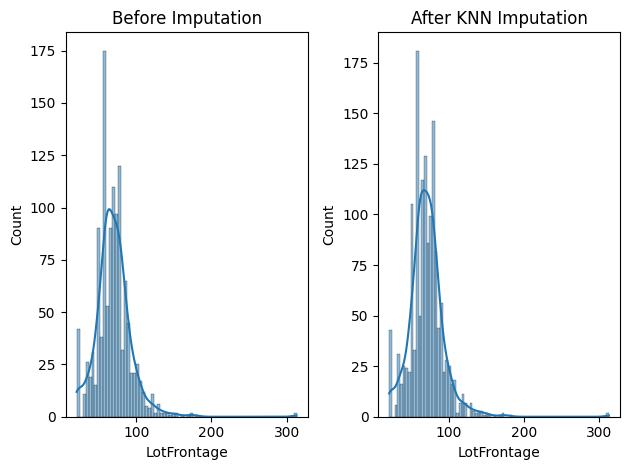

In [17]:
# Before
plt.subplot(1, 2, 1)
sns.histplot(df['LotFrontage'], kde=True)
plt.title("Before Imputation")


# After
plt.subplot(1, 2, 2)
sns.histplot(df_knn['LotFrontage'], kde=True)
plt.title("After KNN Imputation")
plt.tight_layout()
plt.show()



In [18]:
df['LotFrontage'].isnull().sum()

259

In [19]:
df_knn['LotFrontage'].isnull().sum()

0

<div style="background-color:#f0f9ff; padding: 15px; border-left: 5px solid #5dade2; border-radius: 8px">

<font size="5"><strong>
 📌 2. Handling Duplicates <br></strong>
</font>
<font size="3">
Duplicate records can mislead your analysis, inflate feature importance, and bias model outcomes. Removing them ensures your dataset is accurate and clean.<br>



<hr>


<font size="4">
🔍 Detecting Duplicate Rows <br>
    <font size="3">
The df.duplicated() method returns a Boolean Series indicating whether a row is a duplicate of a previous one.<br>

Adding .sum() gives the total count of duplicate rows.
</div>


In [20]:
# Check for duplicate rows
df.duplicated().sum()


0

## 🔍 Detecting Duplicate Rows
drop_duplicates() removes all duplicated rows, keeping the first occurrence by default.

In [21]:
# Drop duplicates.Use subset attribute to drop duplicate based on specific columns
df = df.drop_duplicates()


<div style="background-color:#fcf3cf; padding: 15px; border-left: 5px solid #f1c40f; border-radius: 8px"> 
    
 Why Drop Duplicates?</b> <br>

Avoids biased analysis (e.g., inflated averages).<br>
    
Prevents data leakage in predictive modeling.<br>

Ensures that each observation is unique and independent.<br>

⚠️ Make sure the rows are truly duplicate — sometimes similar rows differ by important hidden variables!

</div>

<div style="background-color:#fffaf0; padding: 15px; border-left: 5px solid #e67e22; border-radius: 8px">
<font size="5">
<strong>
 🎯 3. Handling Outliers <br></strong>
</font>
Outliers are extreme values that deviate from the rest of the data. They can skew statistical summaries and mislead machine learning models. <br>

</div>

<hr>
<font size="4">

 📦 Visualizing Outliers with Boxplot
<br>
<font size="3">
 Example: Visualizing outliers in 'GrLivArea'
 </font>
 </font>


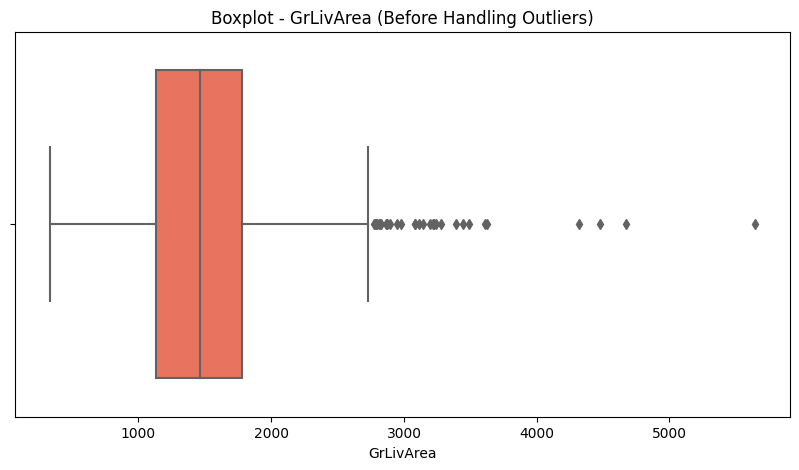

In [22]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['GrLivArea'], color='tomato')
plt.title("Boxplot - GrLivArea (Before Handling Outliers)")
plt.show()


## 📊 Statistical Methods to Detect Outliers


### 🔹 1. Z-Score Method

In [23]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['GrLivArea']))
df_z = df[(z_scores < 3)]  # Keep only data within 3 standard deviations


🔍 A Z-score > 3 is considered an outlier for normally distributed data.

### 🔹 2. IQR (Interquartile Range) Method

In [24]:
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[(df['GrLivArea'] >= lower_bound) & (df['GrLivArea'] <= upper_bound)]


📌 IQR is useful for skewed distributions and is more robust than the Z-score method.

### ✂️ 3. Winsorization (Capping Outliers)

In [25]:
from scipy.stats.mstats import winsorize

# Capping the extreme 5% on both ends
df['GrLivArea_winsor'] = winsorize(df['GrLivArea'], limits=[0.05, 0.05])


🛡 Winsorization replaces extreme values with nearest acceptable values — preserving dataset size while reducing outlier impact.

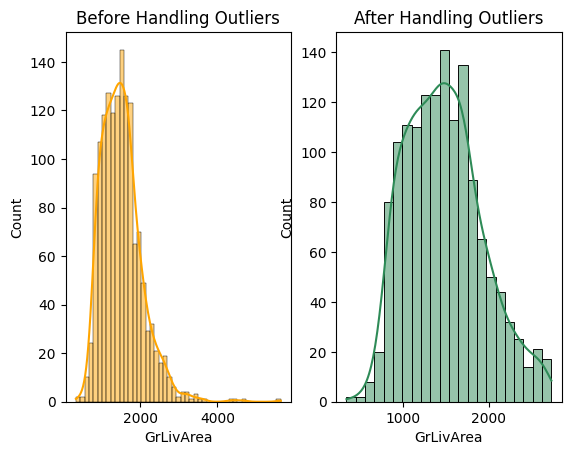

In [26]:
# Before
plt.subplot(1, 2, 1)
sns.histplot(df['GrLivArea'], kde=True, color='orange')
plt.title("Before Handling Outliers")


# After (IQR or Winsorization)
plt.subplot(1, 2, 2)
sns.histplot(df_iqr['GrLivArea'], kde=True, color='seagreen')
plt.title("After Handling Outliers")
plt.show()


<div style="background-color:#eafaf1; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px">
✅ Summary <br>
Use boxplots for quick visual detection.<br>
Use Z-score for normally distributed data.<br>
Use IQR for skewed distributions.<br>
Use winsorization/capping when you need to keep all rows but limit extreme values.

<hr>
</div>


<div style="background-color:#f3f8ff; padding: 15px; border-left: 5px solid #3498db; border-radius: 8px">
<font size="5"><strong>
🧬 4. Handling Inconsistent Data</strong> <br>
</font>
Inconsistent data entries—like typos, extra spaces, or varying capitalizations—can mislead your analysis, especially in categorical columns. Let’s clean them up!
<br>
</div>

<hr>
<font size="3">
 🔍 Common Issues in Text Data: <br>

- Typos or misspellings  <br>
- Inconsistent use of uppercase/lowercase  <br>
- Leading/trailing whitespaces  <br>
- Mixed formats for similar values<br>

<hr>
<font size="3">
 🧼 Cleaning Tools in Pandas



In [27]:
# Before cleaning
print(df['Neighborhood'].unique())


['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']



### 🔠 Convert to Lowercase

In [28]:

df['Neighborhood'] = df['Neighborhood'].str.lower()


### ✂️ Remove Extra Whitespace



In [29]:
df['Neighborhood'] = df['Neighborhood'].str.strip()


### 🔁 Replacing Values
###### Fixes typos and standardizes naming.

In [30]:
df['Neighborhood'] = df['Neighborhood'].replace({
    'collgcr': 'collgcr',  # correct typo if needed. this is just example
    'collgr': 'collgcr'
})


In [31]:
# After cleaning
df['Neighborhood'] = df['Neighborhood'].str.lower().str.strip()
print(df['Neighborhood'].unique())


['collgcr' 'veenker' 'crawfor' 'noridge' 'mitchel' 'somerst' 'nwames'
 'oldtown' 'brkside' 'sawyer' 'nridght' 'names' 'sawyerw' 'idotrr'
 'meadowv' 'edwards' 'timber' 'gilbert' 'stonebr' 'clearcr' 'npkvill'
 'blmngtn' 'brdale' 'swisu' 'blueste']


<div style="background-color:#eafaf1; padding: 15px; border-left: 5px solid #2ecc71; border-radius: 8px">
✅ Summary<br>
Always standardize case and spacing before grouping or encoding.<br>
Clean categorical variables using .str.lower(), .str.strip(), and .replace().<br>
This step avoids silent grouping errors and improves model performance.<br>
    
<hr>
</div>


<div style="background-color:#fef9f5; padding: 15px; border-left: 5px solid #e67e22; border-radius: 8px">
<strong>
<font size="5"> 📐 5. Data Type Conversions</font> <br>
</strong>
Sometimes, features are stored in incorrect formats — for example, numeric codes stored as strings or date fields stored as plain text.<br>

Converting data to the correct type helps:<br>
- Perform accurate analysis<br>
- Apply the right cleaning technique <br>
- Improve model compatibility<br>

</div>

<hr>

<font size="4">🔍 Check Data Types</font>


In [32]:

# View data types of all columns
df.dtypes


Id                    int64
MSSubClass            int64
MSZoning             object
LotFrontage         float64
LotArea               int64
                     ...   
SaleType             object
SaleCondition        object
SalePrice             int64
LotFrontage_imp     float64
GrLivArea_winsor      int64
Length: 83, dtype: object

### 🔄 Convert to Numeric
##### Useful when numbers are stored as strings like "60" instead of 60.



In [33]:
# Convert a column to numeric (if possible), set errors='coerce' to handle invalid entries
df['MSSubClass'] = pd.to_numeric(df['MSSubClass'], errors='coerce')


### 🕒 Convert to Datetime
##### Enables date-based filtering, time difference calculation, etc.



In [34]:
# Convert column to datetime format
df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y')


### 🔤 Convert to Category
##### Speeds up processing and helps encoding later on.

In [35]:
# Convert text column to category type (memory efficient)
df['Neighborhood'] = df['Neighborhood'].astype('category')


### 🧠 Identify Numerical vs Categorical Features



In [36]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


In [37]:
print(numerical_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'LotFrontage_imp', 'GrLivArea_winsor']


In [38]:
print(categorical_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


<div style="background-color:#f0fdf4; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px">
✅ Summary<br>
Use .astype() for basic type casting.<br>
Use pd.to_datetime() for time-related fields.<br>
Separate categorical and numerical columns to apply the right transformations later.<br>
<hr>
</div>


<div style="background-color:#f5f8ff; padding: 15px; border-left: 5px solid #5dade2; border-radius: 8px">
<strong>
<font size="5"> 🔤 6. Encoding Categorical Variables </font><br>
</strong>
Machine learning models need numerical inputs. Categorical values must be <strong>encoded</strong> so that models can interpret them correctly.< br>

</div>

<hr>

<font size="4"> 🧱 1. One-Hot Encoding <br> </font>

- Creates <strong>binary columns</strong> for each category. <br>
- Best for <strong>nominal (unordered)</strong> categorical variables.<br>



In [39]:
df['Neighborhood'].value_counts()

Neighborhood
names      225
collgcr    150
oldtown    113
edwards    100
somerst     86
gilbert     79
nridght     77
sawyer      74
nwames      73
sawyerw     59
brkside     58
crawfor     51
mitchel     49
noridge     41
timber      38
idotrr      37
clearcr     28
swisu       25
stonebr     25
blmngtn     17
meadowv     17
brdale      16
veenker     11
npkvill      9
blueste      2
Name: count, dtype: int64

In [40]:
# Using pandas
df_encoded = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)


### 🔢 2. Label Encoding
- Converts each category to a unique integer.<br>
- Use for tree-based models or when order doesn't matter.<br>

In [41]:
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Street_encoded'] = le.fit_transform(df['Street'])


### 📶 3. Ordinal Encoding
- Assigns ordered numeric values to categories.
- Use when categories have a natural rank (e.g., Low < Medium < High).

In [43]:
df['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [44]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_map = [['Ex', 'Fa', 'TA', 'Gd']]
encoder = OrdinalEncoder(categories=ordinal_map)
df['Quality_encoded'] = encoder.fit_transform(df[['ExterQual']])


<div style="background-color:#eafaf1; padding: 15px; border-left: 5px solid #2ecc71; border-radius: 8px">
✅ Summary <br>
Use One-Hot Encoding for unordered categories.<br>
Use Ordinal Encoding when order matters.<br>
Use Label Encoding cautiously — only with tree models or for simple categories.<br>
Always consider handling unseen categories in real-world predictions.
<hr>
</div>


<div style="background-color:#f9fafa; padding: 15px; border-left: 5px solid #1abc9c; border-radius: 8px">
<font size="5">
<strong>
 📉 7. Scaling and Normalization <br></font></strong>

Feature scaling ensures that numerical features are on the same scale — crucial for models like KNN, SVM, and gradient descent-based algorithms.<br>

</div>

<hr>

## ⚖️ Why Scaling Matters?

- Prevents features with large ranges from dominating the model. <br>
- Improves convergence speed and model performance.<br>
- Essential for **distance-based models** (KNN, KMeans) and **regularized models** (Ridge, Lasso).

<hr>

## 🔧 Common Scalers

### 🔹 1. StandardScaler (Z-score Normalization)

Centers the data around 0 with unit variance.



In [45]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(df[['GrLivArea']])

### 🔹 2. MinMaxScaler
##### Scales values between 0 and 1. Sensitive to outliers.

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled2 = scaler.fit_transform(df[['GrLivArea']])


### 🔹 3. RobustScaler
##### Uses median and IQR — best for handling outliers.

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled3 = scaler.fit_transform(df[['GrLivArea']])


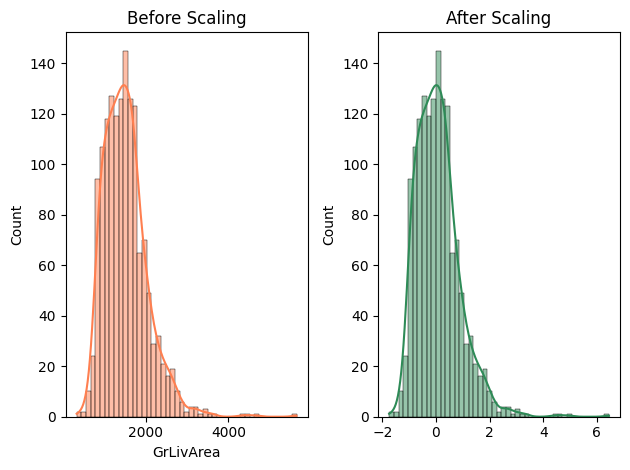

In [48]:
import matplotlib.pyplot as plt

# Original
plt.subplot(1, 2, 1)
sns.histplot(df['GrLivArea'], kde=True, color='coral')
plt.title("Before Scaling")

# Scaled
plt.subplot(1, 2, 2)
sns.histplot(df_scaled3.flatten(), kde=True, color='seagreen')
plt.title("After Scaling")
plt.tight_layout()
plt.show()


<div style="background-color:#eafaf1; padding: 15px; border-left: 5px solid #16a085; border-radius: 8px">
✅ Summary<br>
🔷 StandardScaler – Best for normal distributions.<br>
🔶 MinMaxScaler – Best for bounded ranges (0 to 1).<br>
🔷 RobustScaler – Best when outliers are present.
<hr>
</div>

<div style="background-color:#fef6fb; padding: 15px; border-left: 5px solid #c0392b; border-radius: 8px">
<font size="5"><strong>
 🧪 8. Feature Engineering Tips <br> </font></strong>
Feature engineering is the art of transforming raw data into meaningful input for machine learning models. The right features can improve model accuracy more than changing algorithms! <br>

</div>

<hr>

## 🆕 1. Creating New Features

### ➕ Mathematical Combinations
##### Combine related numeric fields to capture holistic information.



In [49]:

# Total square footage
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


### 💡 Ratios & Proportions
##### Normalize one variable by another to remove scale bias.


In [50]:
# Bathrooms per bedroom
df['Bath_per_Bedroom'] = df['FullBath'] / (df['BedroomAbvGr'] + 1)


### 🗓️ 2. Extracting from Dates
#### ⌛ Convert and Decompose Date Columns

##### Useful for identifying seasonality or yearly trends.


In [51]:
df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y')

# Extract useful parts
df['Year'] = df['YrSold'].dt.year
df['Month'] = df['YrSold'].dt.month
df['Quarter'] = df['YrSold'].dt.quarter


### 🔗 3. Combining Columns
#### 🧑‍🤝‍🧑 Interactions Between Features

##### Sometimes the product or interaction of features captures more than individual ones.

In [52]:

# Interaction between overall quality and living area
df['Qual_SF'] = df['OverallQual'] * df['GrLivArea']

<div style="background-color:#eafaf1; padding: 15px; border-left: 5px solid #27ae60; border-radius: 8px">
✅ Summary<br>
Combine numerical features logically (e.g., totals, ratios).<br>
Extract date parts for temporal patterns.<br>
Parse text columns for hidden signals.<br>
Create interaction features to capture non-linear relationships.<br>
🔁 Iterate + Evaluate: Not all engineered features will improve the model, so validate them using metrics or feature importance!
<hr>
</div>


<div align="center" style="background: linear-gradient(to right, #f9e7fe, #e0f7fa); border: 2px solid #d3d3d3; border-radius: 15px; padding: 25px; margin: 20px 0; box-shadow: 2px 2px 12px #ccc;">
<font size="6"><strong>
 💬 9. Conclusion</strong>
</font> <br>
</div>

<div style="font-size: 17px; line-height: 1.7; padding: 20px; background-color: #ffffff; border-left: 6px solid #9b59b6; border-radius: 10px;">

✨ Throughout this notebook, we walked through a **complete data cleaning pipeline** — a crucial foundation step for any successful data science or machine learning project. <br>

Here’s what we covered:<br>

🔹 Identifying and handling <strong>missing values</strong> <br>
🔹 Removing <strong>duplicates</strong> and treating <strong>outliers</strong><br>
🔹 Fixing <strong>inconsistent entries</strong> and <strong>data types</strong>   <br>
🔹 <strong>Encoding categorical</strong> variables  <br>
🔹 Applying <strong>scaling & normalization</strong>  <br>
🔹 Tips for <strong>feature engineering</strong>  <br>
🔹 Visual comparisons to understand impact  <br>

---

📌 <strong>Practical Takeaway:</strong>   <br>
> <em>🧠 “Always explore your data thoroughly before modeling. Clean data = Clean results!”</em> <br>

---

✅ If your data is messy, your model will suffer — no matter how advanced it is.  <br>
✅ Clean, consistent, and meaningful data makes the difference between mediocre and outstanding performance.<br>

</div>

<div align="center" style="margin-top: 30px;">

🎯 <strong>Clean Data → Smart Decisions → Great Models</strong> 🎯 <br>

</div>


<div align="center" style="background-color:#fff9e6; padding: 15px; border: 2px dashed #f1c40f; border-radius: 10px;font-size: 28px;">

👍 <strong>If you found this notebook useful, give it an upvote!</strong><br>
Your support means a lot. 💛

</div>
